<a href="https://colab.research.google.com/github/PAYAL980/Matrix-Product-States-Preparation-/blob/main/State_prep_using_rsvd_and_Benchmarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries

import timeit
import numpy as np
from matplotlib import pyplot as plt
from numpy.fft import fft as fft_np
from scipy.fftpack import fft as fft_sp

In [2]:
# 1st cosine function

def f1(x):
    return np.cos(2*np.pi*x)

In [3]:
# 20 cosine function

def f2(x):
    fun = 0
    for iz in range(1,21):
        fun += np.cos(1.1*(4*iz-2)*(x - 0.5))

    return fun

In [4]:
# 1 cosine + cusps function

def f3(x):

    fun = np.cos(2*np.pi*x) + 2*np.exp(-3*np.abs(x-0.4)) + np.exp(-2*np.abs(x-0.7)) + 2*np.exp(-3*np.abs(x-0.8)) + np.exp(-2*np.abs(x-0.9))

    return fun

In [8]:
## Function for estimating the state prep time for classical fft

def f_time(num_points, sampling_rate, f, which_fun):

    # Creating Signal using the 'f' function
    # X = np.arange(0,1, 1.0/u)

    u = sampling_rate

    X = np.arange(0,1, step=1/num_points)
    Y = [f(X[iz]) for iz in range(len(X))]

    # Measuring time

    # if which_fun=='np':
    #     start = timeit.default_timer()
    #     # print("The start time is :", start)

    #     res_X = fft_np(Y)

    #     k = timeit.default_timer() - start
    #     print("The time took to perform fft for ", num_points, " data points is :",k, 'seconds.')

    # if which_fun=='sp':
    #     start = timeit.default_timer()
    #     # print("The start time is :", start)

    #     res_X = fft_sp(Y)

    #     k = timeit.default_timer() - start
    #     print("The took to perform fft for ", num_points, " data points is :",k, 'seconds.')

    # Frequency for plotting fft function

    # N = len(res_X)
    # # n = np.arange(N)
    # n = np.arange(N)
    # T = N/u
    # freq = n/T

    # # Plotting before and after 'fft'

    # plt.figure(figsize=(16, 3))
    # plt.subplot(121)
    # plt.plot(X,Y, 'r')
    # plt.xlabel('x')
    # plt.ylabel('f(x)')
    # plt.title('Original function')
    # plt.subplot(122)
    # plt.plot(freq, np.abs(res_X))
    # plt.xlabel('freq')
    # plt.ylabel('fft(f(x))')
    # plt.title('After fft')

    # Returns the time elapsed during fft

    return 0

In [9]:
time_array = []  # array for storing time
qubits = [] # array to store index of qubit

# Example

for iz in range(2, 14):

    dt_points = 2**(2*iz)

    qubits.append(2*iz)

    start = timeit.default_timer()
    f_time(num_points=dt_points, sampling_rate=200, f=f1, which_fun='np')
    k = timeit.default_timer() - start
    print("The took to perform fft for ", dt_points, " data points is :",k, "seconds")


    time_array.append(k)

# for iz in range(2, 14):

#     dt_points = 2**(2*iz)

#     qubits.append(2*iz)
#     start = timeit.default_timer()
#     f_time(num_points=dt_points, sampling_rate=200, f=f1, which_fun='np')
#     k = timeit.default_timer() - start


#     time_array4.append(k)

The took to perform fft for  16  data points is : 0.00013369999999213178 seconds
The took to perform fft for  64  data points is : 0.00020489999997153063 seconds
The took to perform fft for  256  data points is : 0.0007831159999796 seconds
The took to perform fft for  1024  data points is : 0.003078770000001896 seconds
The took to perform fft for  4096  data points is : 0.01657580800008418 seconds
The took to perform fft for  16384  data points is : 0.030131062999998903 seconds
The took to perform fft for  65536  data points is : 0.11953001099993799 seconds
The took to perform fft for  262144  data points is : 0.5132815169999958 seconds
The took to perform fft for  1048576  data points is : 1.9397998029999144 seconds
The took to perform fft for  4194304  data points is : 8.991631276000021 seconds
The took to perform fft for  16777216  data points is : 36.49835755699996 seconds
The took to perform fft for  67108864  data points is : 139.89154333199997 seconds


Text(0.5, 1.0, 'Time taken for state prep for classical dft')

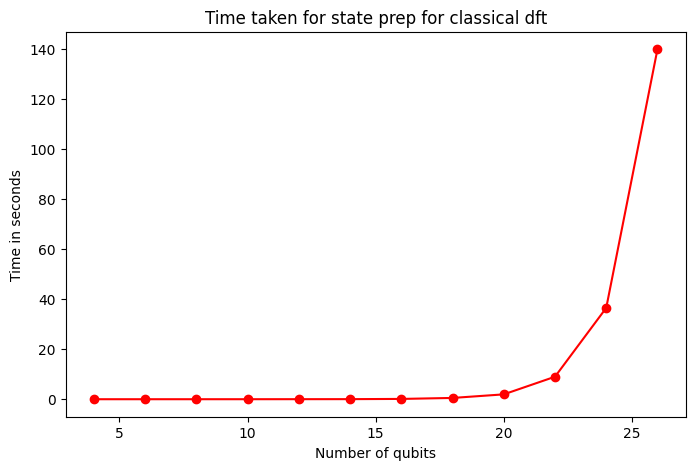

In [10]:
plt.figure(figsize=(8,5))
plt.plot(qubits, time_array, 'ro-')
plt.xlabel("Number of qubits")
plt.ylabel("Time in seconds")
plt.title("Time taken for state prep for classical dft")
# plt.xticks(qubits_20cos)

## MPS

In [11]:
pip install quimb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.2/449.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 4.3 MB/s eta 0:00:00


In [12]:
from quimb import *
from quimb.tensor.tensor_1d import MatrixProductState
import numpy as np
import time
import timeit
from matplotlib import pyplot as plt

In [13]:
''' Function to create an array to be used as input for the polynomial function '''

def input_to_fun(start, stop, num_of_qubits):

    return np.arange(start, stop, step=1/(2**num_of_qubits))

In [14]:
# 1st cosine function

def f1(x):
    return np.cos(2*np.pi*x)

# 20 cosine function

def f2(x):
    fun = 0
    for iz in range(1,21):
        fun += np.cos(1.1*(4*iz-2)*(x - 0.5))

    return fun

# 1 cosine + cusps function

def f3(x):

    fun = np.cos(2*np.pi*x) + 2*np.exp(-3*np.abs(x-0.4)) + np.exp(-2*np.abs(x-0.7)) + 2*np.exp(-3*np.abs(x-0.8)) + np.exp(-2*np.abs(x-0.9))

    return fun

In [15]:
''' define the polynomial function here '''

def polynomial_fun(which_fun, x):

    if which_fun==1:
        fun = f1(x)
    # fun = np.cos(2*pi*x)
    if which_fun==2:
        fun = f2(x)

    if which_fun==3:
        fun = f3(x)

    return fun

In [16]:
''' Function to create MPS

       num_of_qubits: int
                    number of qubits/sites
       start: int
              start of the range for the input function
       stop : int
              end of the range for the input function
       cutoff: float
              cutoff for trunction svd
       which_fun: 1 or 2 or 3
              1: f1(x)
              2: f2(x)
              3: f3(x)'''

def function_to_mps(num_of_qubits, start, stop, cutoff, which_fun, max_bond_dim=None):

    inputToFun =  input_to_fun(start, stop, num_of_qubits)

    state = polynomial_fun(which_fun, inputToFun)

    psi = MatrixProductState.from_dense(state, dims= [2]*num_of_qubits, method = 'rsvd', cutoff = cutoff, absorb = 'right', max_bond = max_bond_dim)

    return psi

For  4 qubits, the time to create MPS is  0.005063001000053191


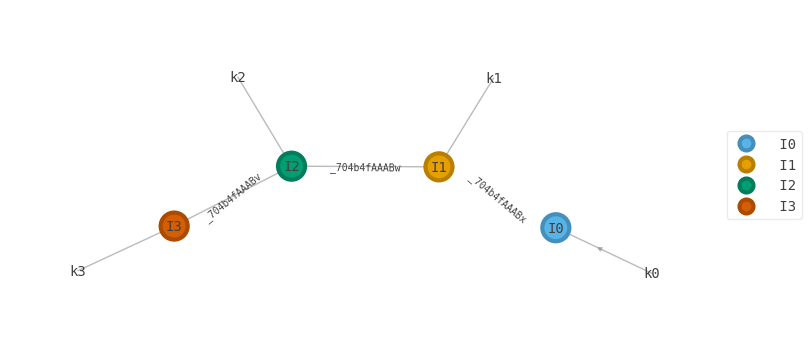

For  6 qubits, the time to create MPS is  0.015072841999881348


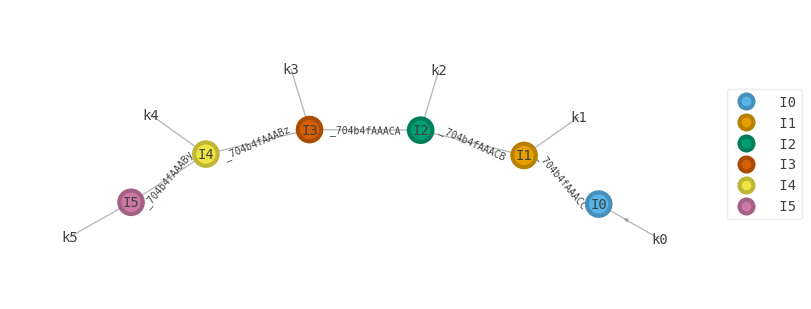

For  8 qubits, the time to create MPS is  0.01740204799989442


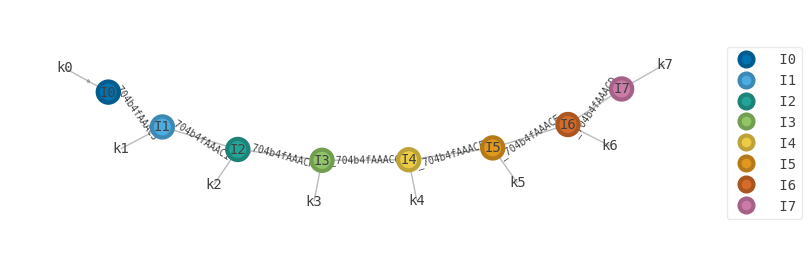

For  10 qubits, the time to create MPS is  0.019183368000085466


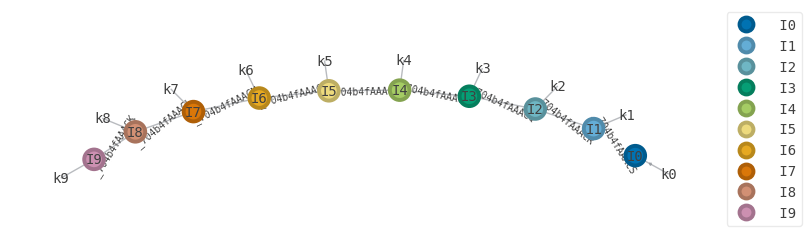

For  12 qubits, the time to create MPS is  0.024435571000140044


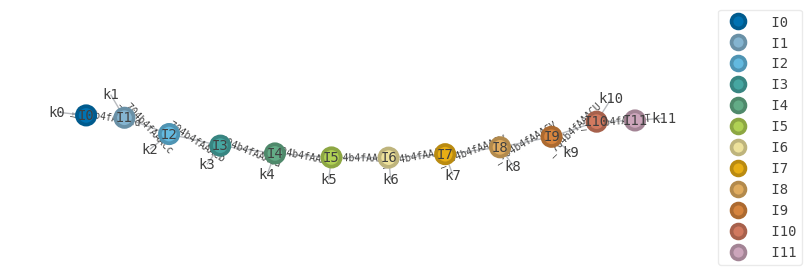

For  14 qubits, the time to create MPS is  0.028291089999811447


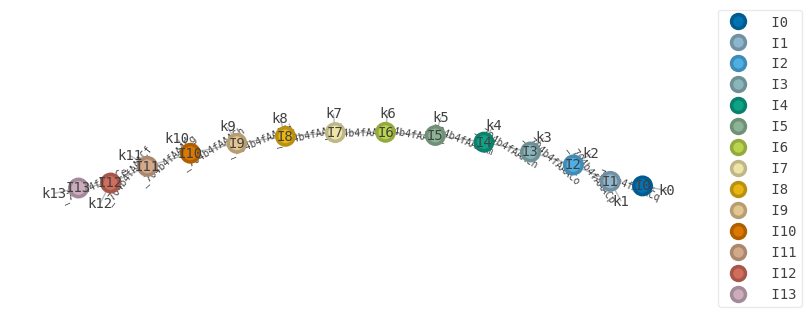

For  16 qubits, the time to create MPS is  0.05367151499990541


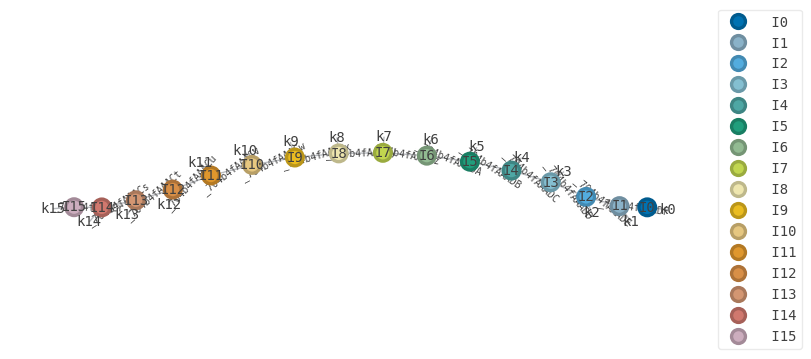

For  18 qubits, the time to create MPS is  0.13335055199991075


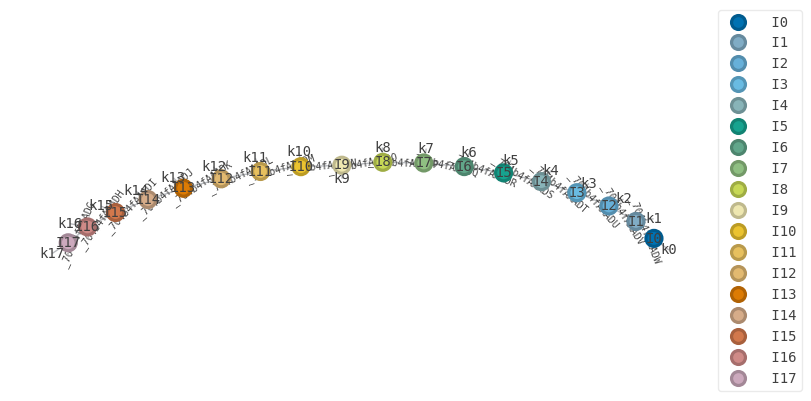

For  20 qubits, the time to create MPS is  0.3551443849999032


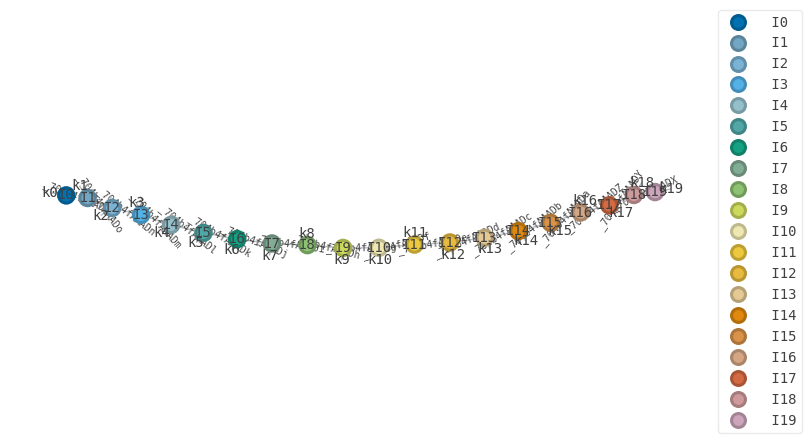

For  22 qubits, the time to create MPS is  1.2511231910000333


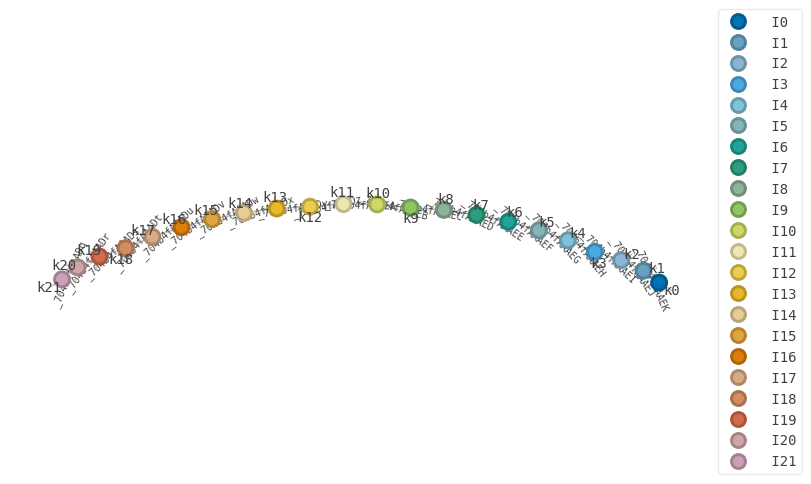

For  24 qubits, the time to create MPS is  5.5280821200001355


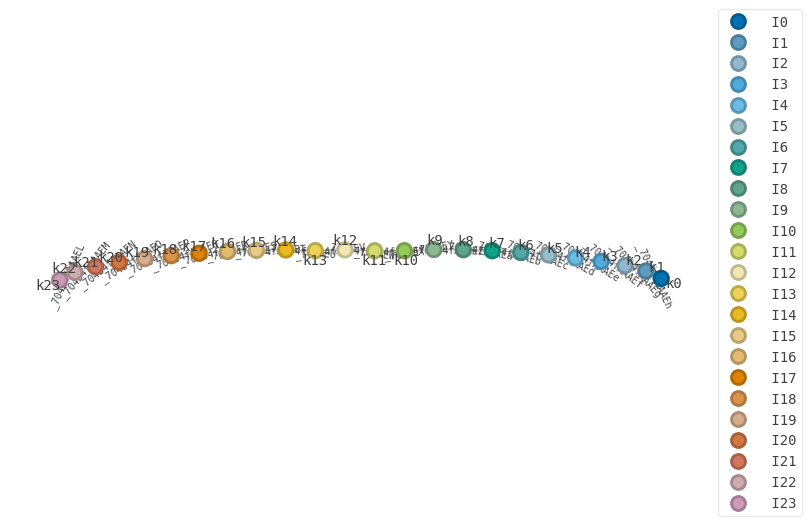

For  26 qubits, the time to create MPS is  17.387989255999855


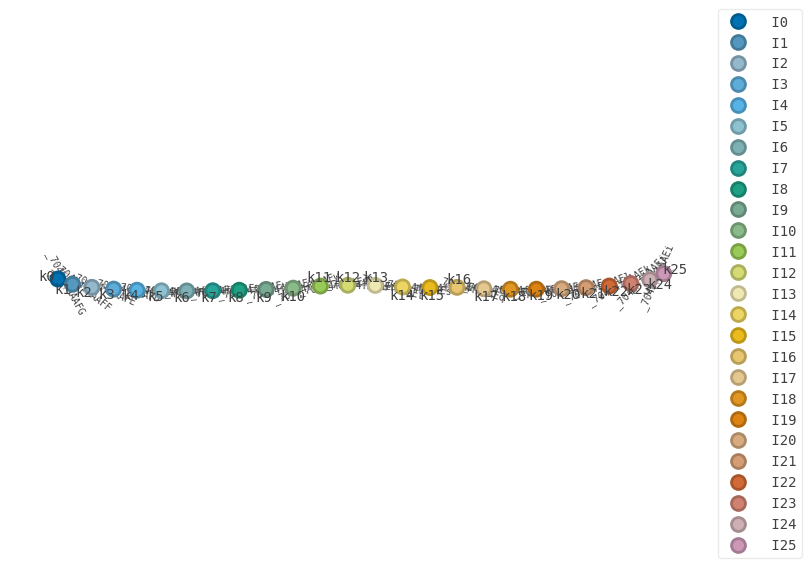

In [18]:
time_array_cos = []  # array for storing time
qubits_cos = [] # array to store index of qubit

# For cos(2pi x) function
for iz in range(2, 14):

    start = timeit.default_timer()

    psi1 = function_to_mps(num_of_qubits=2*iz, start=0, stop=1, cutoff=1e-12, which_fun=1, max_bond_dim=2)

    k = timeit.default_timer() - start

    time_array_cos.append(k)
    qubits_cos.append(2*iz)

    print("For ", 2*iz, "qubits, the time to create MPS is ", k)
    psi1.draw(color=[f'I{i}' for i in range(2*iz)], show_inds='all', figsize=(8, 6))

Text(0, 0.5, 'Time in seconds')

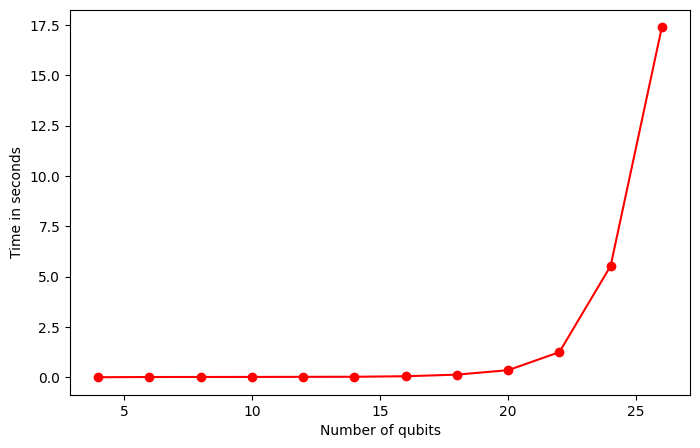

In [19]:
plt.figure(figsize=(8,5))
plt.plot(qubits_cos, time_array_cos, 'ro-')
plt.xlabel("Number of qubits")
plt.ylabel("Time in seconds")
# plt.xticks(qubits_cos)

For  4 qubits, the time to create MPS is  0.01635391700006039


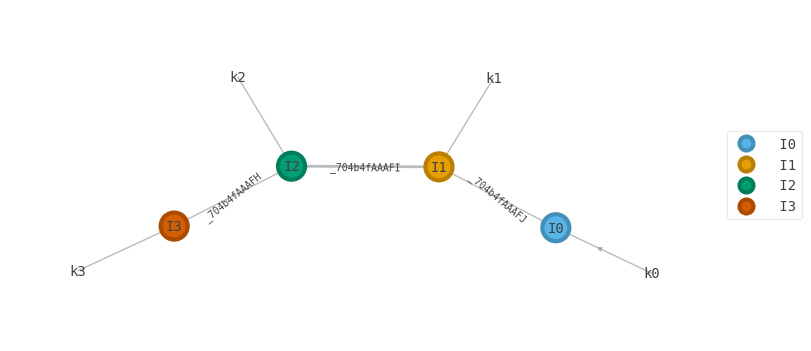

For  6 qubits, the time to create MPS is  0.014463968999962162


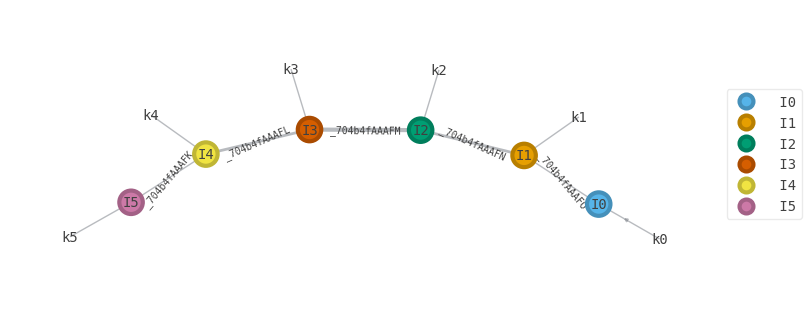

For  8 qubits, the time to create MPS is  0.01807563200009099


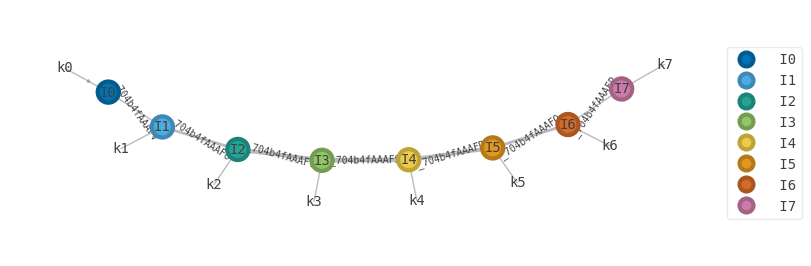

For  10 qubits, the time to create MPS is  0.028092448000052173


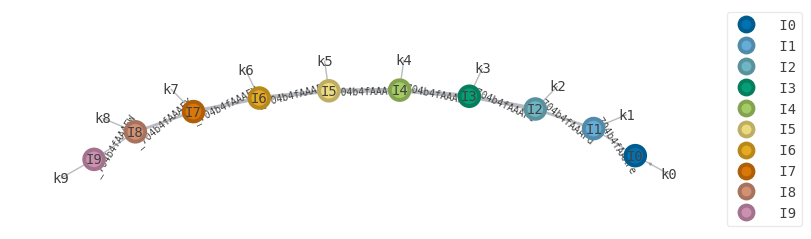

For  12 qubits, the time to create MPS is  0.0383153200000379


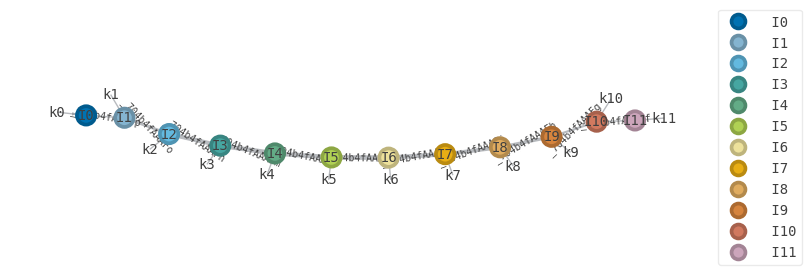

For  14 qubits, the time to create MPS is  0.04540400799987765


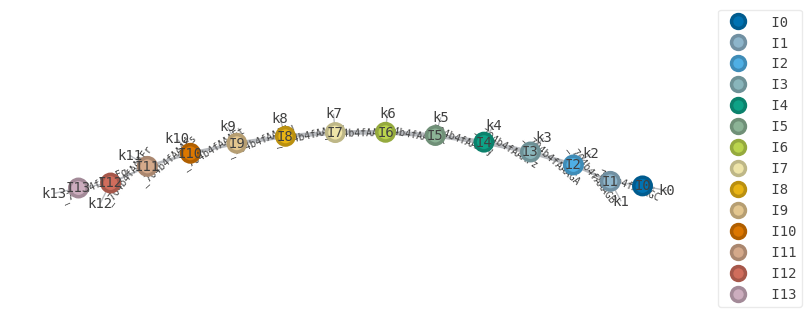

For  16 qubits, the time to create MPS is  0.10418887399987398


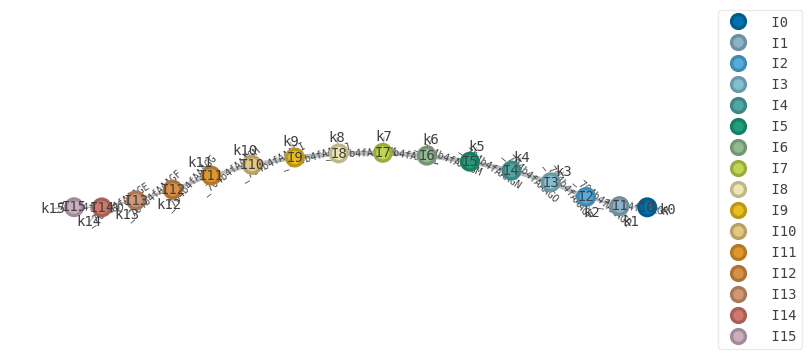

For  18 qubits, the time to create MPS is  0.3175501680000252


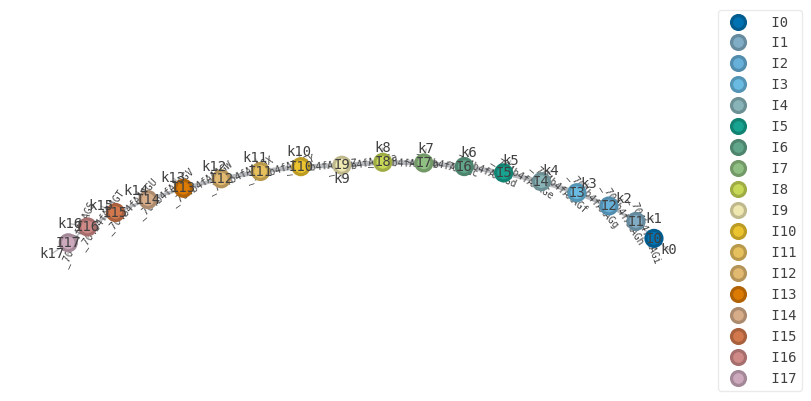

For  20 qubits, the time to create MPS is  1.2361509270001534


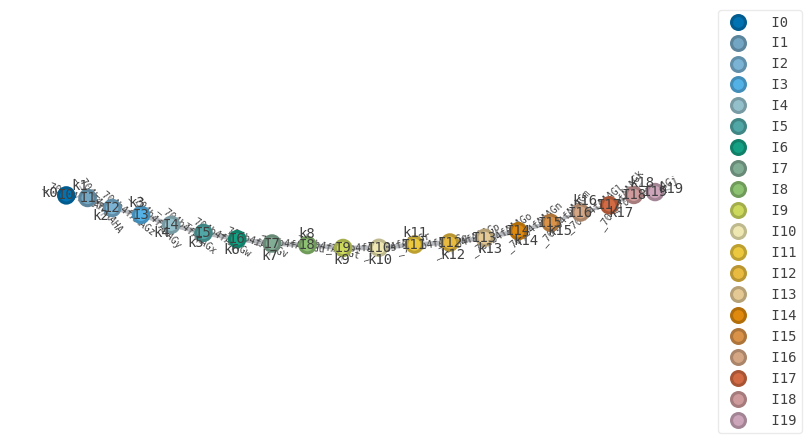

For  22 qubits, the time to create MPS is  4.665846278000117


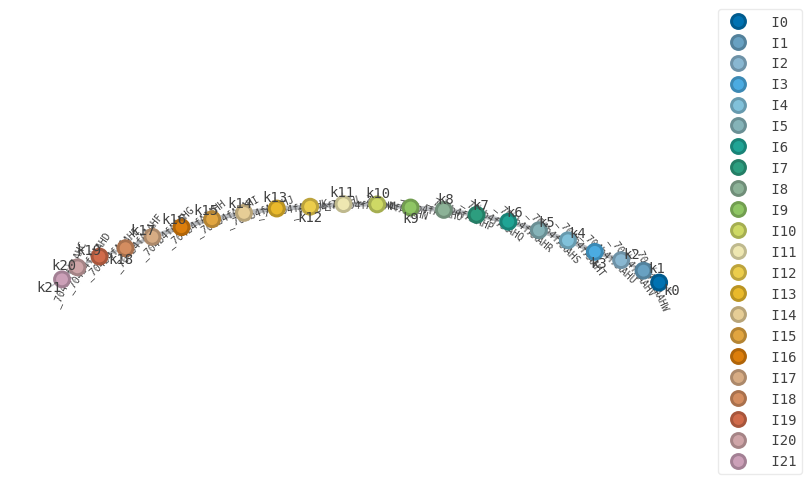

For  24 qubits, the time to create MPS is  20.00567882999985


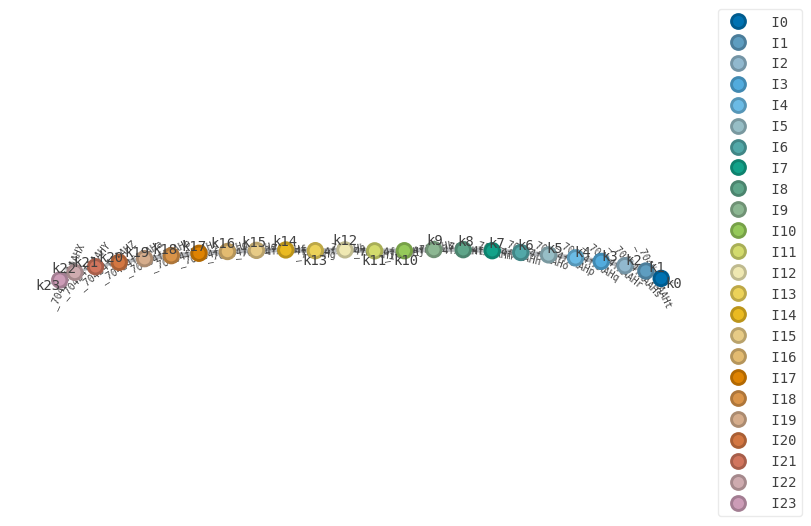

For  26 qubits, the time to create MPS is  54.33452936399999


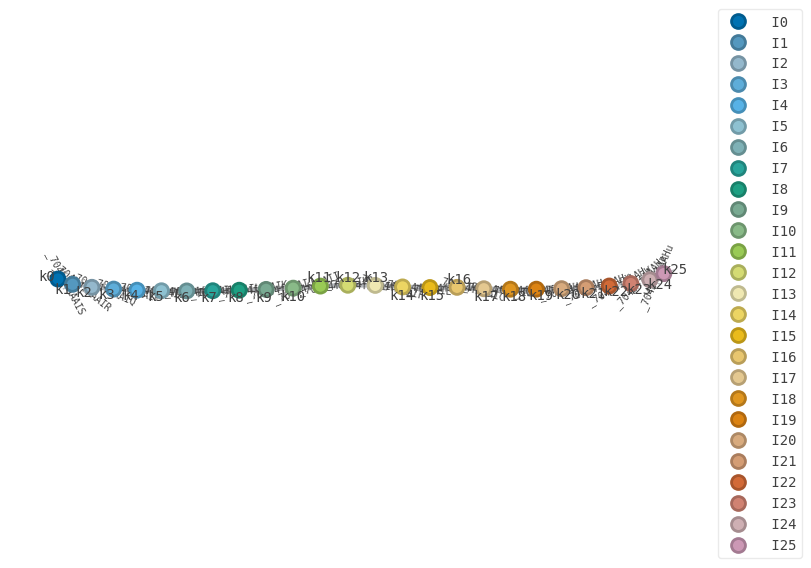

In [20]:
time_array_20cos = []  # array for storing time
qubits_20cos = [] # array to store index of qubit

# For 20 cosine function
for iz in range(2, 14):

    start = timeit.default_timer()

    psi1 = function_to_mps(num_of_qubits=2*iz, start=0, stop=1, cutoff=1e-12, which_fun=2, max_bond_dim=10)

    k = timeit.default_timer() - start

    time_array_20cos.append(k)
    qubits_20cos.append(2*iz)

    print("For ", 2*iz, "qubits, the time to create MPS is ", k)
    psi1.draw(color=[f'I{i}' for i in range(2*iz)], show_inds='all', figsize=(8, 6))

Text(0, 0.5, 'Time in seconds')

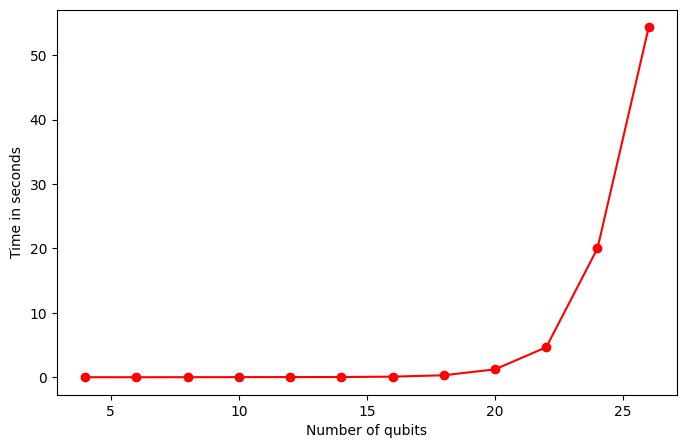

In [21]:
plt.figure(figsize=(8,5))
plt.plot(qubits_20cos, time_array_20cos, 'ro-')
plt.xlabel("Number of qubits")
plt.ylabel("Time in seconds")
# plt.xticks(qubits_20cos)

For  4 qubits, the time to create MPS is  0.012152143000093929


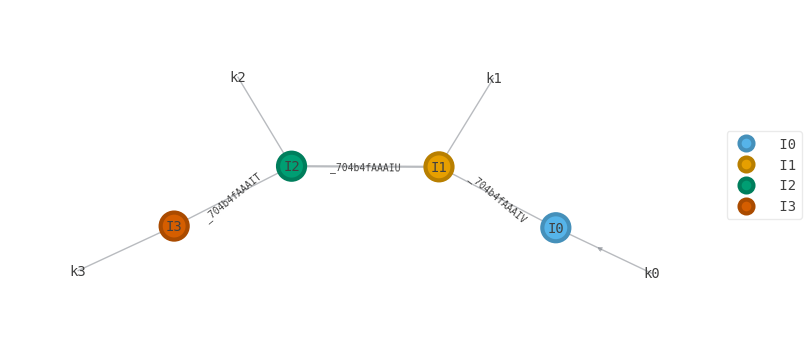

For  6 qubits, the time to create MPS is  0.01400478599998678


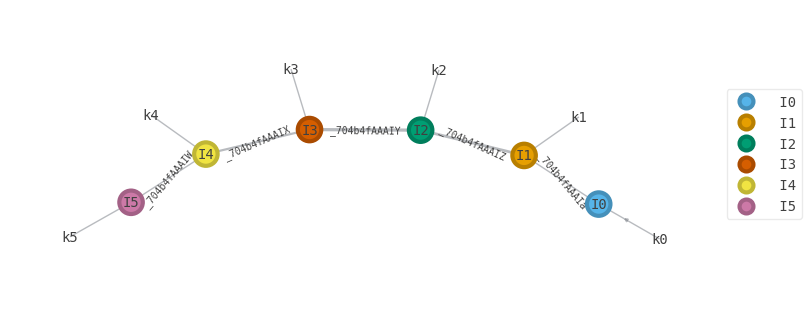

For  8 qubits, the time to create MPS is  0.018642693999936455


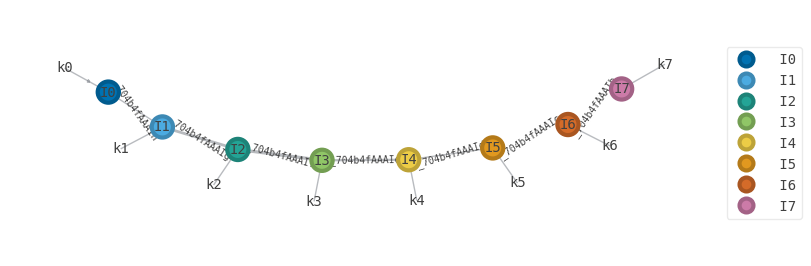

For  10 qubits, the time to create MPS is  0.020687463000058415


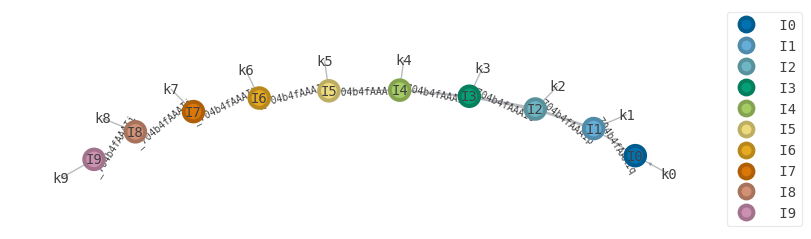

For  12 qubits, the time to create MPS is  0.024168680000002496


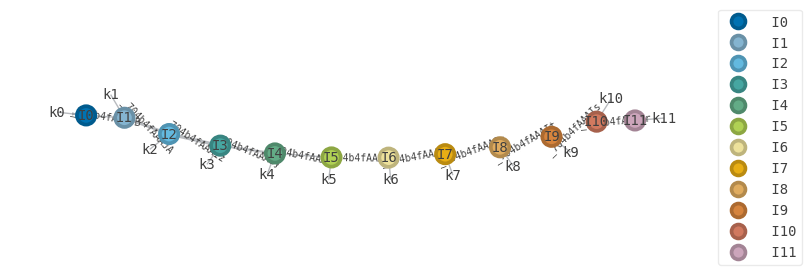

For  14 qubits, the time to create MPS is  0.027073633999862068


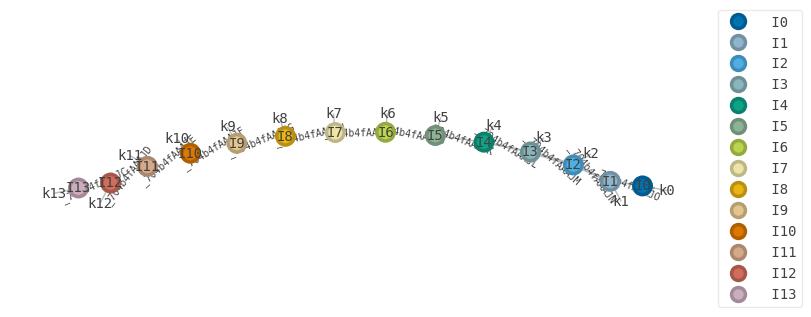

For  16 qubits, the time to create MPS is  0.044341633999920305


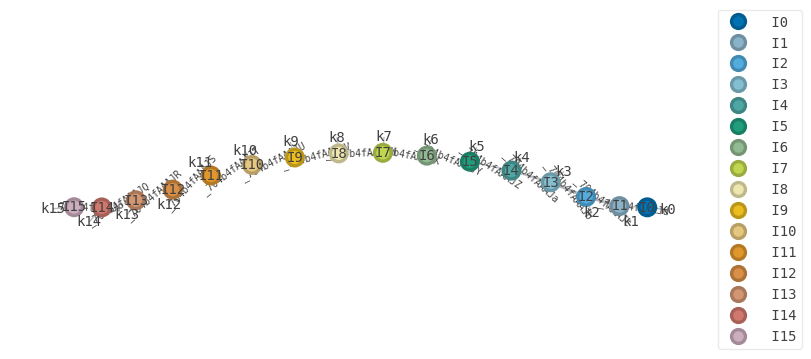

For  18 qubits, the time to create MPS is  0.1881635950001055


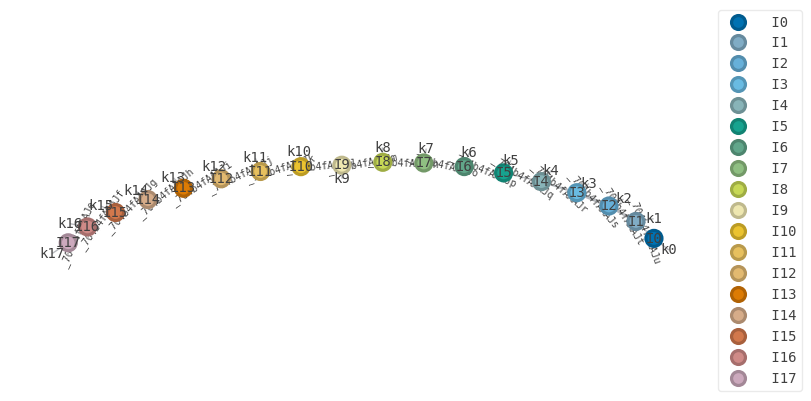

For  20 qubits, the time to create MPS is  0.5219145250000565


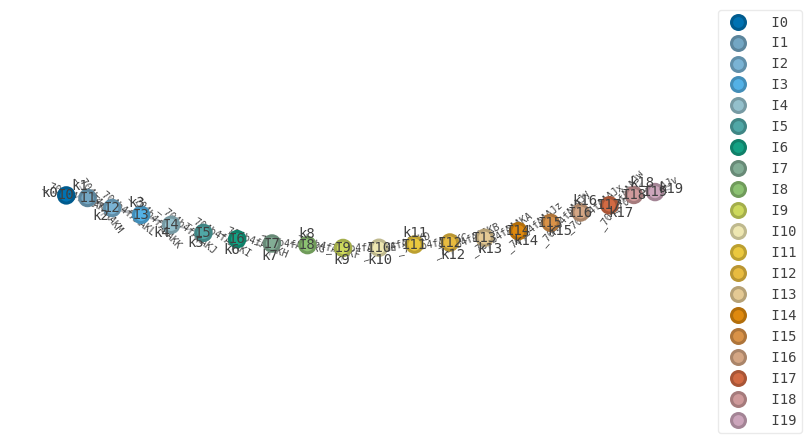

For  22 qubits, the time to create MPS is  1.6086968229999457


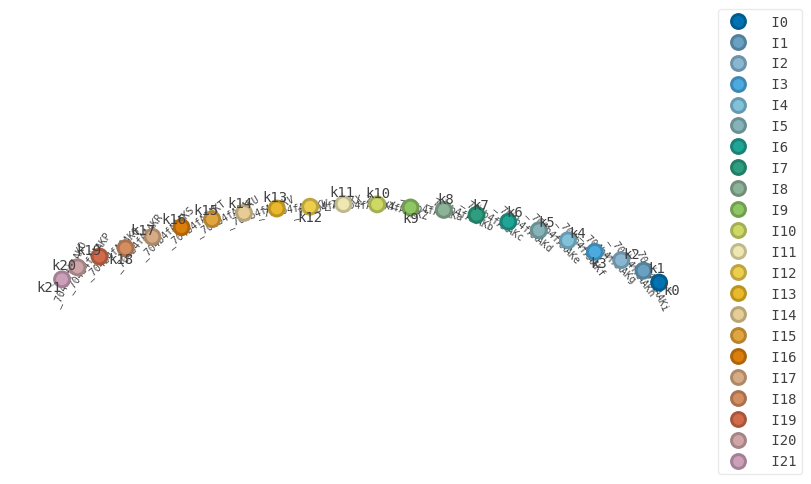

For  24 qubits, the time to create MPS is  11.428724702999943


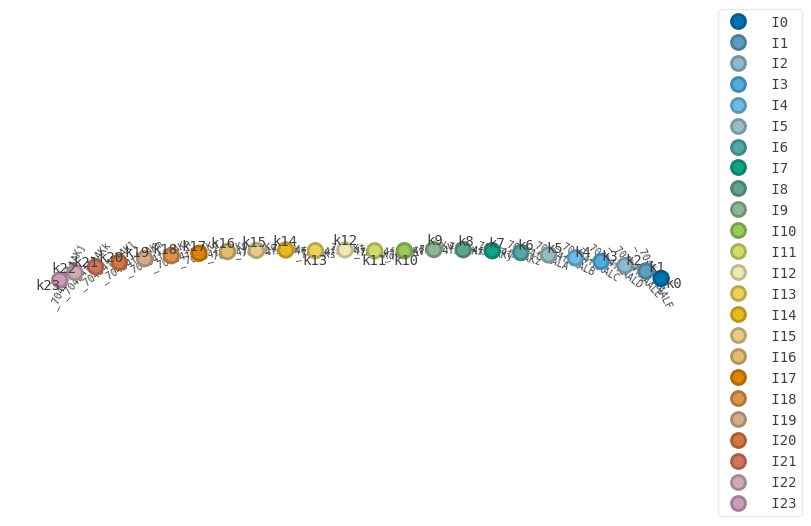

For  26 qubits, the time to create MPS is  31.75397775500005


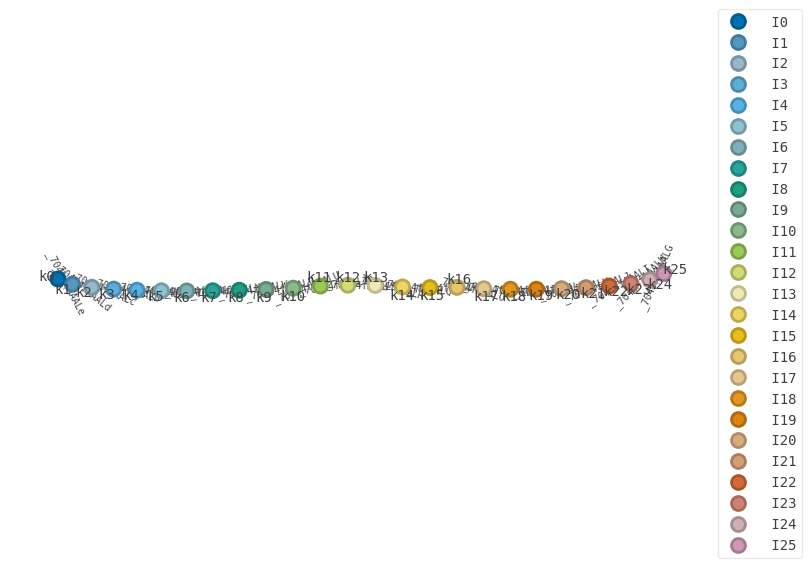

In [22]:
time_array_cusp = []  # array for storing time
qubits_cusp = [] # array to store index of qubit

# For cosine + cusp function
for iz in range(2, 14):

    start = timeit.default_timer()

    psi1 = function_to_mps(num_of_qubits=2*iz, start=0, stop=1, cutoff=1e-4, which_fun=3, max_bond_dim=10)

    k = timeit.default_timer() - start

    time_array_cusp.append(k)
    qubits_cusp.append(2*iz)

    print("For ", 2*iz, "qubits, the time to create MPS is ", k)
    psi1.draw(color=[f'I{i}' for i in range(2*iz)], show_inds='all', figsize=(8, 6))

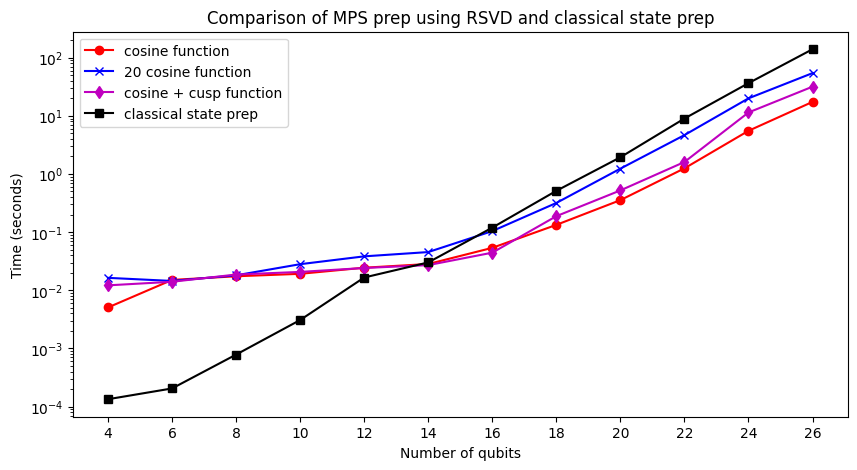

In [23]:
plt.figure(figsize=(10,5))
plt.semilogy(qubits_cos, time_array_cos, 'ro-')
plt.semilogy(qubits_cusp, time_array_20cos, 'bx-')
plt.semilogy(qubits_cusp, time_array_cusp, 'md-')
plt.semilogy(qubits_cos, time_array, 'ks-')
plt.xticks(qubits_cusp)
plt.xlabel("Number of qubits")
plt.ylabel("Time (seconds)")
plt.title("Comparison of MPS prep using RSVD and classical state prep")
plt.legend(['cosine function', '20 cosine function', 'cosine + cusp function', 'classical state prep'])